/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetic'] not found. Falling back to DejaVu S

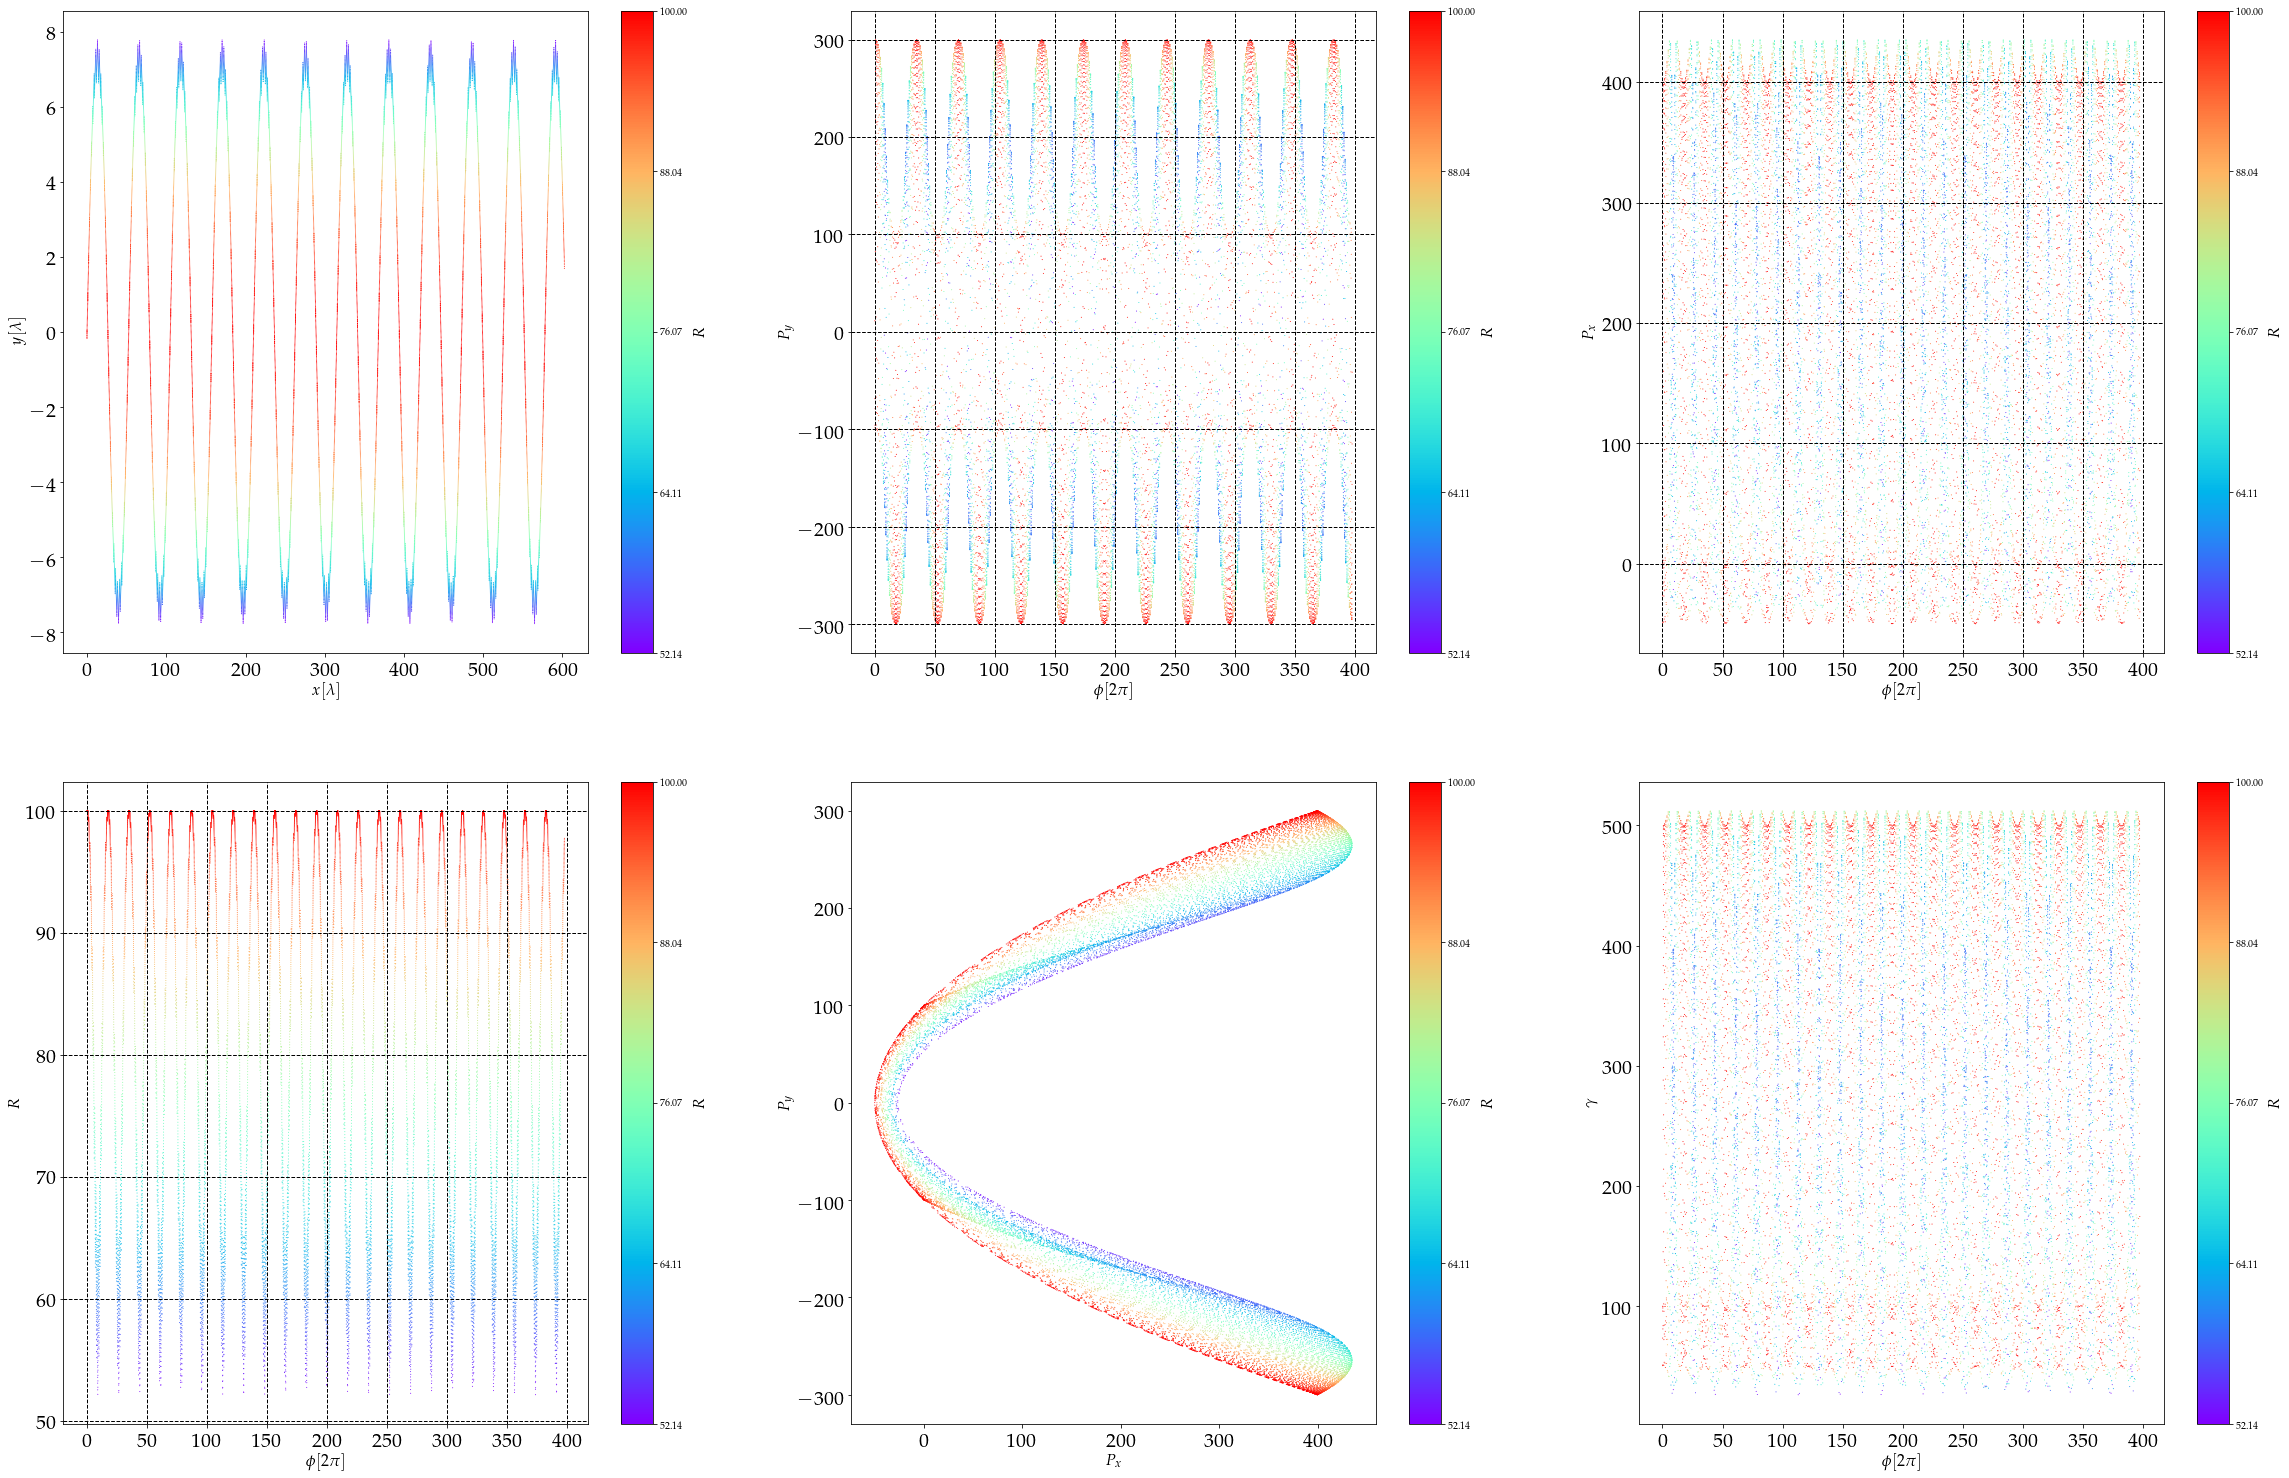

In [1]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=20001

insert1='./Data_no/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x [\lambda]$',fontdict=font)
plt.ylabel(r'$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x$',fontdict=font)
plt.ylabel('$P_y$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

fig = plt.gcf()
fig.set_size_inches(40, 26)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./summary/a=0_b=0.01_py=100.png',format='png',dpi=1280)
#plt.close("all")

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

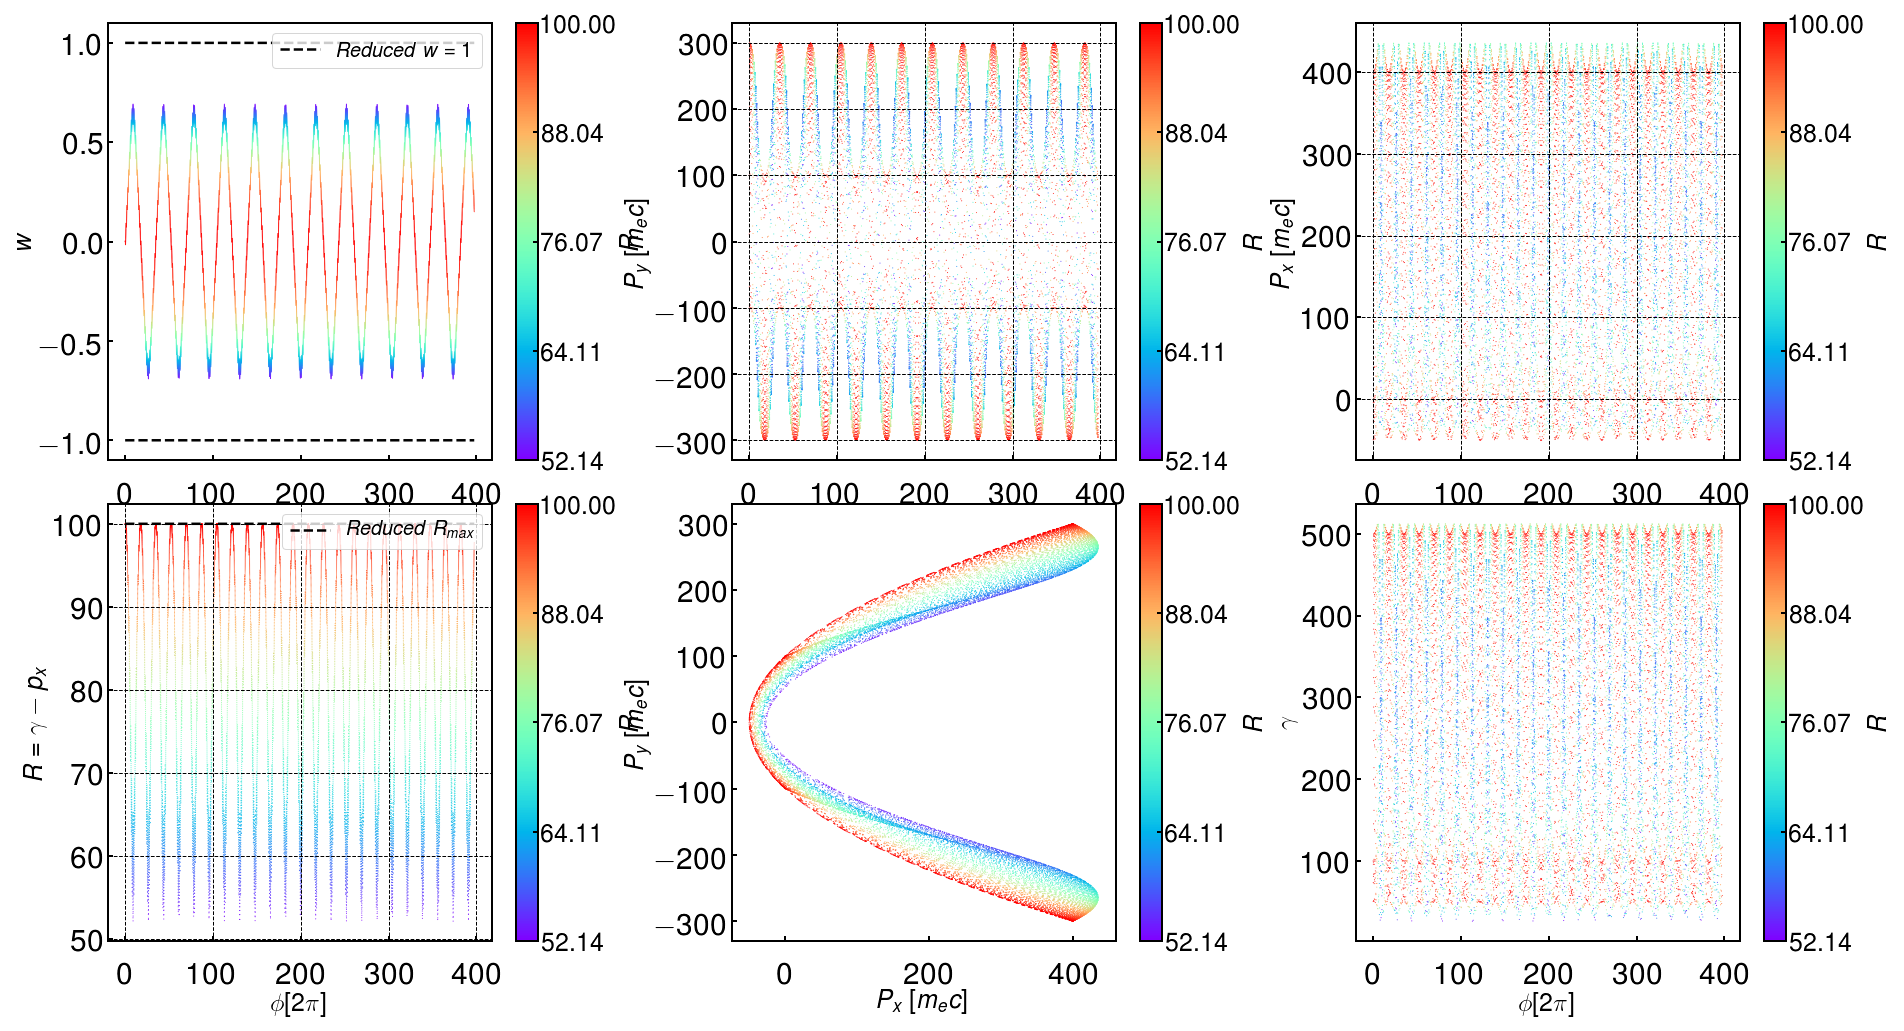

In [3]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')



part_number=1
nsteps=20001

insert1='./Data_no/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(100)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/y_max0

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, y[index,:]/y_max0, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot((t[index,:]-x[index,:])/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$w$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.colorbar()
plt.plot((t[index,:]-x[index,:])/2/np.pi, R_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ R_{max}$')
plt.legend(loc='upper right')
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R=\gamma-p_x$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.10, wspace=0.30)

fig = plt.gcf()
fig.set_size_inches(30, 15)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./Data/dla.png',format='png',dpi=250)
#plt.close("all")


/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

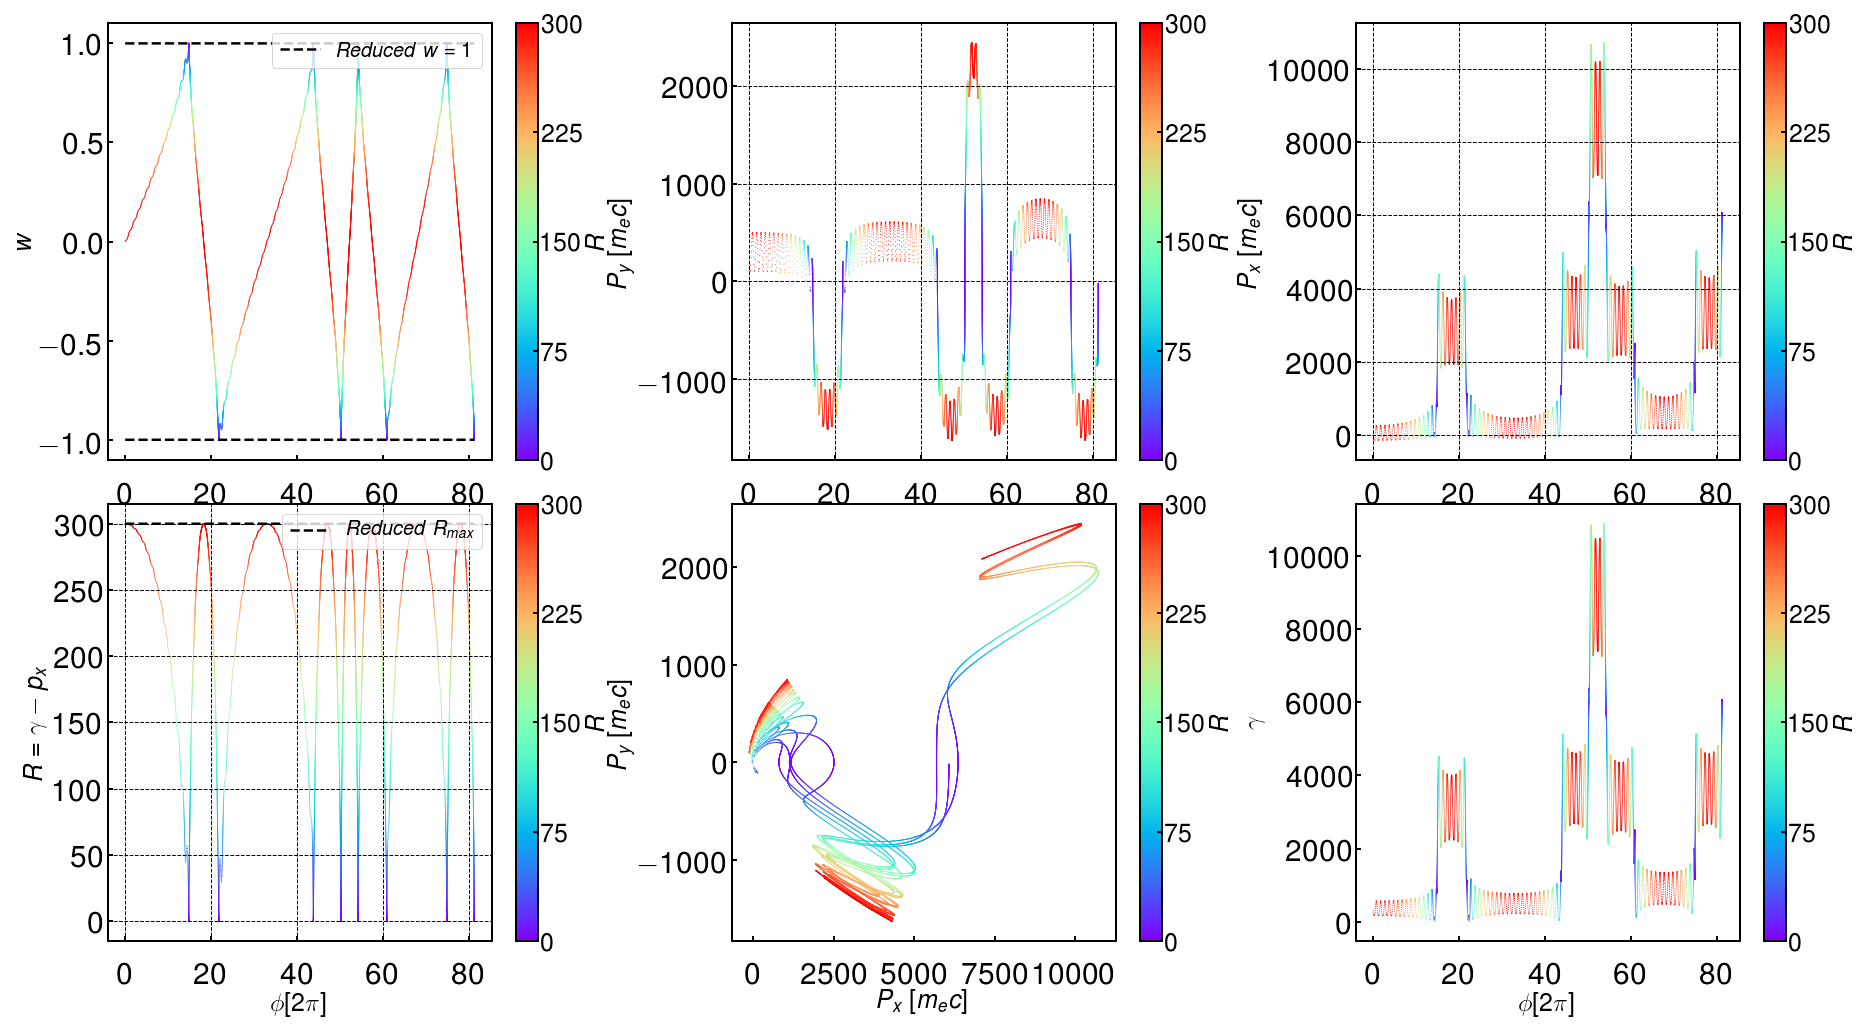

In [7]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')



part_number=1
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(300)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/y_max0

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, y[index,:]/y_max0, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot((t[index,:]-x[index,:])/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot((t[index,:]-x[index,:])/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$w$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.colorbar()
plt.plot((t[index,:]-x[index,:])/2/np.pi, R_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ R_{max}$')
plt.legend(loc='upper right')
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R=\gamma-p_x$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.10, wspace=0.30)

fig = plt.gcf()
fig.set_size_inches(30, 15)
#fig.set_size_inches(5, 4.5)
fig.savefig('./png_a200_b002_p300/qed_no_photon_1000.png',format='png',dpi=80)
#plt.close("all")


In [7]:
radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-)
radn_x.shape

(20000,)

In [10]:
radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])
print(np.where(radn_x>0))
radt_x[0:15]

(array([    2,     5,    12,    22,    24,    27,    29,    34,    35,
          36,    70,    72,    78,    94,    97,   101,   102,   104,
         105,   109,   113,   114,   119,   124,   151,   152,   153,
         160,   161,   171,   177,   209,   215,   228,   230,   231,
         253,   289,   292,   293,   295,   300,   332,   342,   383,
         389,   391,   392,   402,   406,   410,   454,   491,   494,
         499,   504,   532,   556,   562,   567,   568,   569,   572,
         580,   581,   596,   598,   599,   602,   603,   790,   798,
         882,   889,   891,   913,   951,   973,   981,   982,   986,
         994,  1005,  1113,  1158,  1166,  1240,  1254,  1293,  1303,
        1346,  1444,  1449,  1451,  1452,  1453,  1471,  1483,  1507,
        1524,  1599,  1626,  1650,  1651,  1659,  1663,  1666,  1671,
        1702,  1763,  1799,  1811,  1813,  1825,  1837,  1868,  1924,
        1969,  1971,  1978,  1980,  2001,  2003,  2166,  2183,  2289,
        2292,  2294

array([0.      , 0.      , 0.115601, 0.      , 0.      , 3.639931,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.084989, 0.      , 0.      ])

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

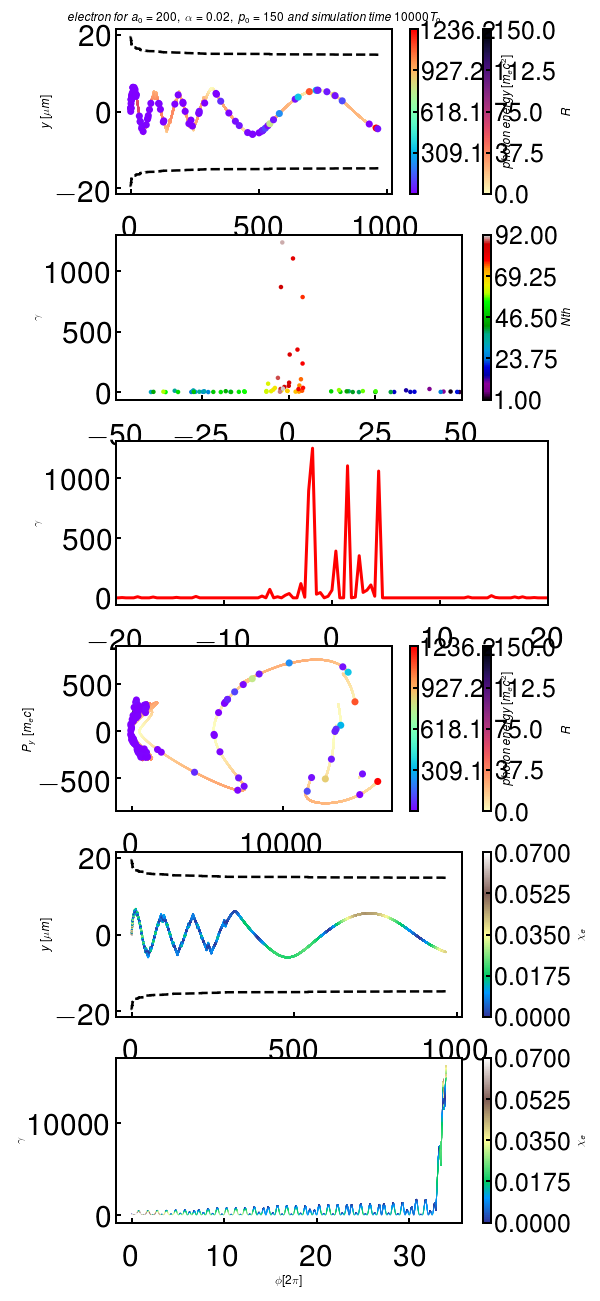

In [4]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def momentum_to_theta(arg_x, arg_y):
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi





part_number=1
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(300)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/2.0/np.pi

index=0

radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])

condition = np.where(radt_x>2)


#momentum_to_theta(arg_x, arg_y)

#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(6,1,1)
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5),shrink=1)
cbar.set_label(r'$R$', fontdict=font)

plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150\ and\ simulation\ time\ 10000T_0$',fontdict=font)

arg_px = px[index,condition]
arg_py = py[index,condition]
radt_x=(radt[index,1:]-radt[index,:-1])
arg_gg = radt_x[condition]
theta_x = np.zeros_like(arg_px)
#print(arg_py/arg_px)
for i in range(np.size(theta_x)):
    theta_x[index,i]=momentum_to_theta(arg_px[index,i],arg_py[index,i])

plt.subplot(6,1,2)
plt.scatter(theta_x/np.pi*180, arg_gg, c=np.linspace(1,np.size(theta_x),np.size(theta_x))[np.newaxis,:], s=20, cmap='nipy_spectral', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(1, np.size(theta_x), 5), shrink=1)# orientation='horizontal', shrink=0.2)
cbar.set_label(r'$Nth$', fontdict=font)
plt.xlim(-50,50)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0,2000.0)


theta_grid = np.linspace(-180.0, 180.0, 1001)
theta_energy = np.zeros_like(theta_grid)
theta_x/np.pi*180
for i in range(np.size(theta_x/np.pi*180)):
    theta_energy[np.min(np.where(theta_x[index,i]/np.pi*180 < theta_grid))]+=arg_gg[i]
#print(theta_energy)
plt.subplot(6,1,3)
plt.plot(theta_grid, theta_energy, '-r', linewidth=3)
plt.xlim(-20,20)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(6,1,4)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
plt.scatter(px[index,condition],py[index,condition],c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(6,1,5)
#plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
#cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
#cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)

plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=eta[index,:], s=4, cmap='terrain', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5),shrink=1)
cbar.set_label(r'$\chi_e$', fontdict=font)

#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150$',fontdict=font)


plt.subplot(6,1,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=eta[index,:], s=1, cmap='terrain', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5))
cbar.set_label(r'$\chi_e$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)


plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.25, wspace=0.30)

fig = plt.gcf()
#fig.set_size_inches(30, 15)
fig.set_size_inches(7, 19.5)
fig.savefig('./png_a200_b002_p150/qed_photon_1000_com.png',format='png',dpi=80)
#plt.close("all")


In [17]:
theta_grid = np.linspace(-180.0, 180.0, 1001)
theta_energy = np.zeros_like(theta_grid)
theta_x/np.pi*180
for i in range(np.size(theta_x/np.pi*180)):
    theta_energy[np.min(np.where(theta_x[index,i]/np.pi*180 < theta_grid))]+=arg_gg[i]
print(theta_energy)
    
    

[0. 0. 0. ... 0. 0. 0.]


In [27]:
(radn_x[np.newaxis,:].shape)

(1, 20000)

In [37]:
np.logspace(1.0,100,5)

array([1.00000000e+001, 5.62341325e+025, 3.16227766e+050, 1.77827941e+075,
       1.00000000e+100])

In [55]:
from numba import vectorize, float64
@vectorize
def momentum_to_theta(arg_x, arg_y):
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi

x=np.linspace(-1,1,201)
y=np.linspace(-10,10,201)

momentum_to_theta(-0.001,-1.0)/np.pi

ModuleNotFoundError: No module named 'numba'

In [73]:
np.zeros_like(12)

array(0)

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

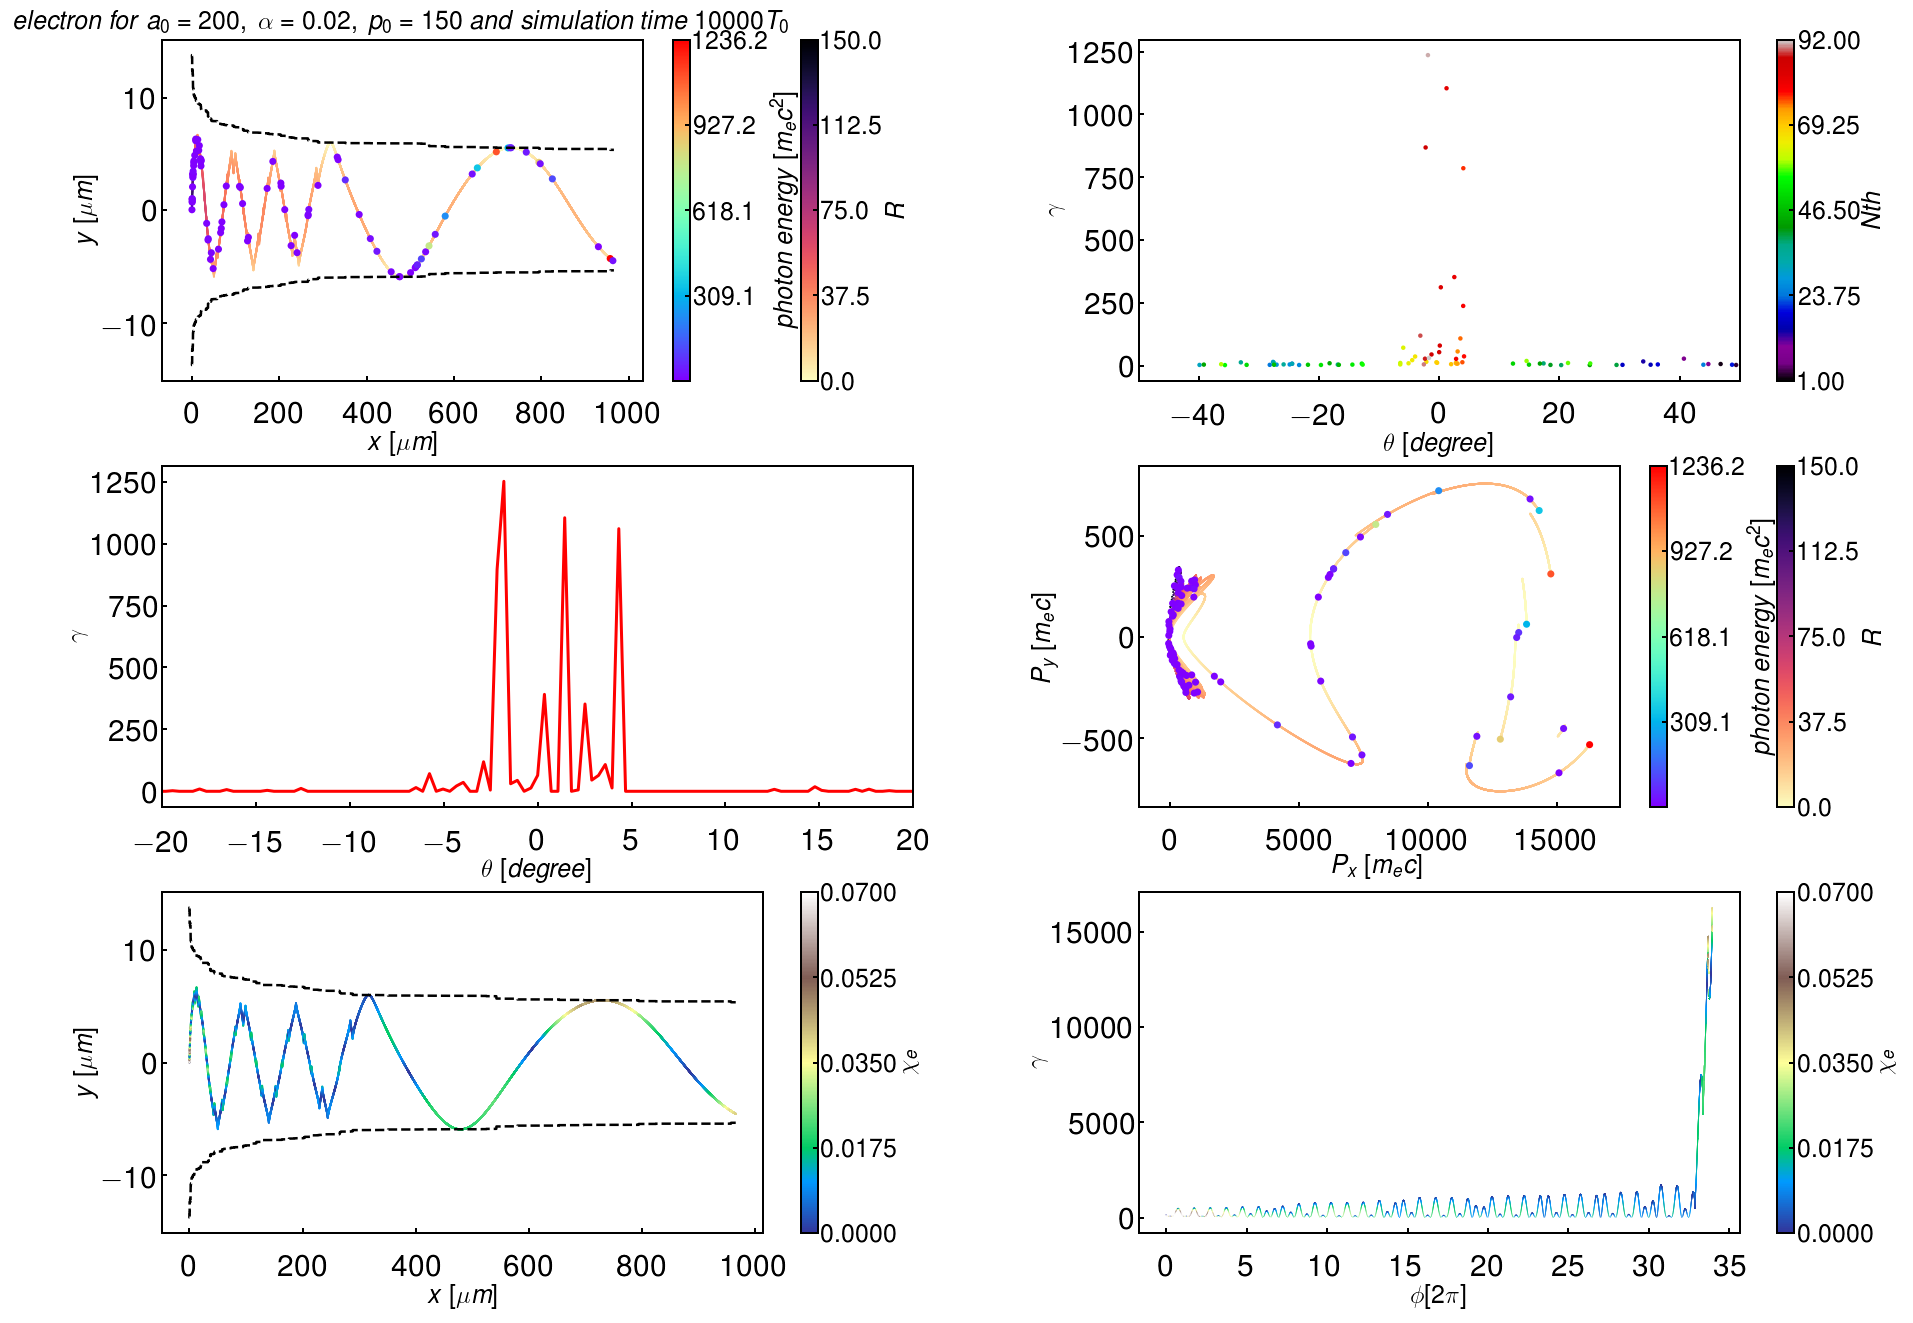

In [2]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def momentum_to_theta(arg_x, arg_y):
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi





part_number=100
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(150)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/2.0/np.pi

index=0

radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])

condition = np.where(radt_x>2)


#momentum_to_theta(arg_x, arg_y)

#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(3,2,1)
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5),shrink=1)
cbar.set_label(r'$R$', fontdict=font)

plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150\ and\ simulation\ time\ 10000T_0$',fontdict=font)

arg_px = px[index,condition]
arg_py = py[index,condition]
radt_x=(radt[index,1:]-radt[index,:-1])
arg_gg = radt_x[condition]
theta_x = np.zeros_like(arg_px)
#print(arg_py/arg_px)
for i in range(np.size(theta_x)):
    theta_x[index,i]=momentum_to_theta(arg_px[index,i],arg_py[index,i])

plt.subplot(3,2,2)
plt.scatter(theta_x/np.pi*180, arg_gg, c=np.linspace(1,np.size(theta_x),np.size(theta_x))[np.newaxis,:], s=20, cmap='nipy_spectral', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(1, np.size(theta_x), 5), shrink=1)# orientation='horizontal', shrink=0.2)
cbar.set_label(r'$Nth$', fontdict=font)
plt.xlim(-50,50)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0,2000.0)


theta_grid = np.linspace(-180.0, 180.0, 1001)
theta_energy = np.zeros_like(theta_grid)
theta_x/np.pi*180
for i in range(np.size(theta_x/np.pi*180)):
    theta_energy[np.min(np.where(theta_x[index,i]/np.pi*180 < theta_grid))]+=arg_gg[i]
#print(theta_energy)
plt.subplot(3,2,3)
plt.plot(theta_grid, theta_energy, '-r', linewidth=3)
plt.xlim(-20,20)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,4)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
plt.scatter(px[index,condition],py[index,condition],c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,5)
#plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
#cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
#cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)

plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=eta[index,:], s=4, cmap='terrain', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5),shrink=1)
cbar.set_label(r'$\chi_e$', fontdict=font)

#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150$',fontdict=font)


plt.subplot(3,2,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=eta[index,:], s=1, cmap='terrain', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5))
cbar.set_label(r'$\chi_e$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)


plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.25, wspace=0.30)

fig = plt.gcf()
#fig.set_size_inches(30, 15)
fig.set_size_inches(30, 19.5)
#fig.savefig('./png_a200_b002_p150/qed_photon_1000_com.png',format='png',dpi=80)
#plt.close("all")


/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


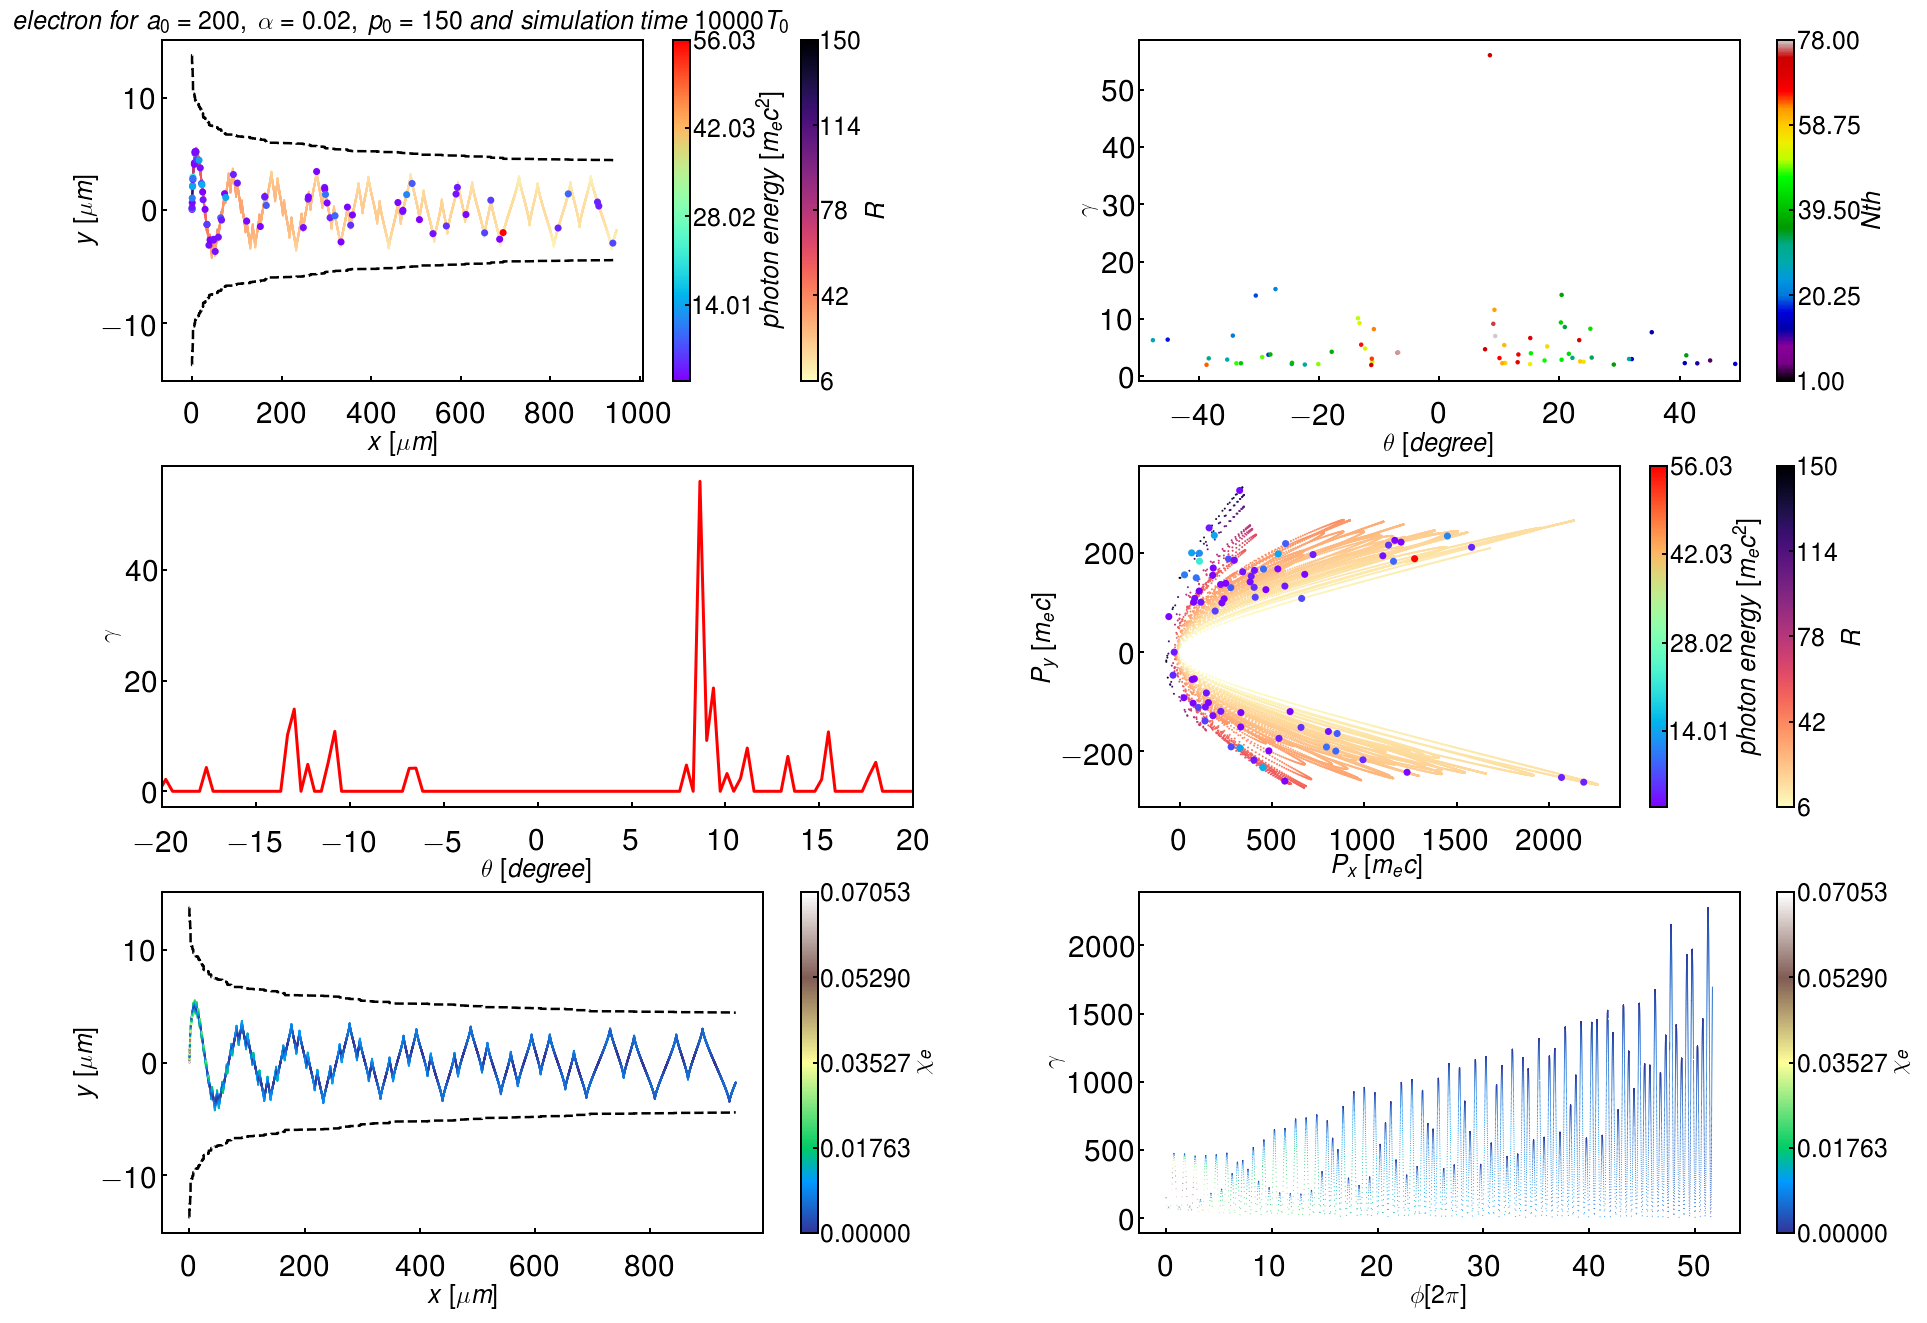

In [6]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def momentum_to_theta(arg_x, arg_y):
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi





part_number=100
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(150)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/2.0/np.pi

index=1

radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])

condition = np.where(radt_x>2)


#momentum_to_theta(arg_x, arg_y)

#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(3,2,1)
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5),shrink=1)
cbar.set_label(r'$R$', fontdict=font)

plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150\ and\ simulation\ time\ 10000T_0$',fontdict=font)

arg_px = px[index,condition]
arg_py = py[index,condition]
radt_x=(radt[index,1:]-radt[index,:-1])
arg_gg = radt_x[condition]
theta_x = np.zeros_like(arg_px)
#print(arg_py/arg_px)
for i in range(np.size(theta_x)):
    theta_x[0,i]=momentum_to_theta(arg_px[0,i],arg_py[0,i])

plt.subplot(3,2,2)
plt.scatter(theta_x/np.pi*180, arg_gg, c=np.linspace(1,np.size(theta_x),np.size(theta_x))[np.newaxis,:], s=20, cmap='nipy_spectral', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(1, np.size(theta_x), 5), shrink=1)# orientation='horizontal', shrink=0.2)
cbar.set_label(r'$Nth$', fontdict=font)
plt.xlim(-50,50)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0,2000.0)


theta_grid = np.linspace(-180.0, 180.0, 1001)
theta_energy = np.zeros_like(theta_grid)
theta_x/np.pi*180
for i in range(np.size(theta_x/np.pi*180)):
    theta_energy[np.min(np.where(theta_x[0,i]/np.pi*180 < theta_grid))]+=arg_gg[i]
#print(theta_energy)
plt.subplot(3,2,3)
plt.plot(theta_grid, theta_energy, '-r', linewidth=3)
plt.xlim(-20,20)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,4)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
plt.scatter(px[index,condition],py[index,condition],c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,5)
#plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
#cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
#cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)

plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=eta[index,:], s=4, cmap='terrain', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5),shrink=1)
cbar.set_label(r'$\chi_e$', fontdict=font)

#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150$',fontdict=font)


plt.subplot(3,2,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=eta[index,:], s=1, cmap='terrain', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5))
cbar.set_label(r'$\chi_e$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)


plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.25, wspace=0.30)

fig = plt.gcf()
#fig.set_size_inches(30, 15)
fig.set_size_inches(30, 19.5)
#fig.savefig('./png_a200_b002_p150/qed_photon_1000_com.png',format='png',dpi=80)
#plt.close("all")


/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falli

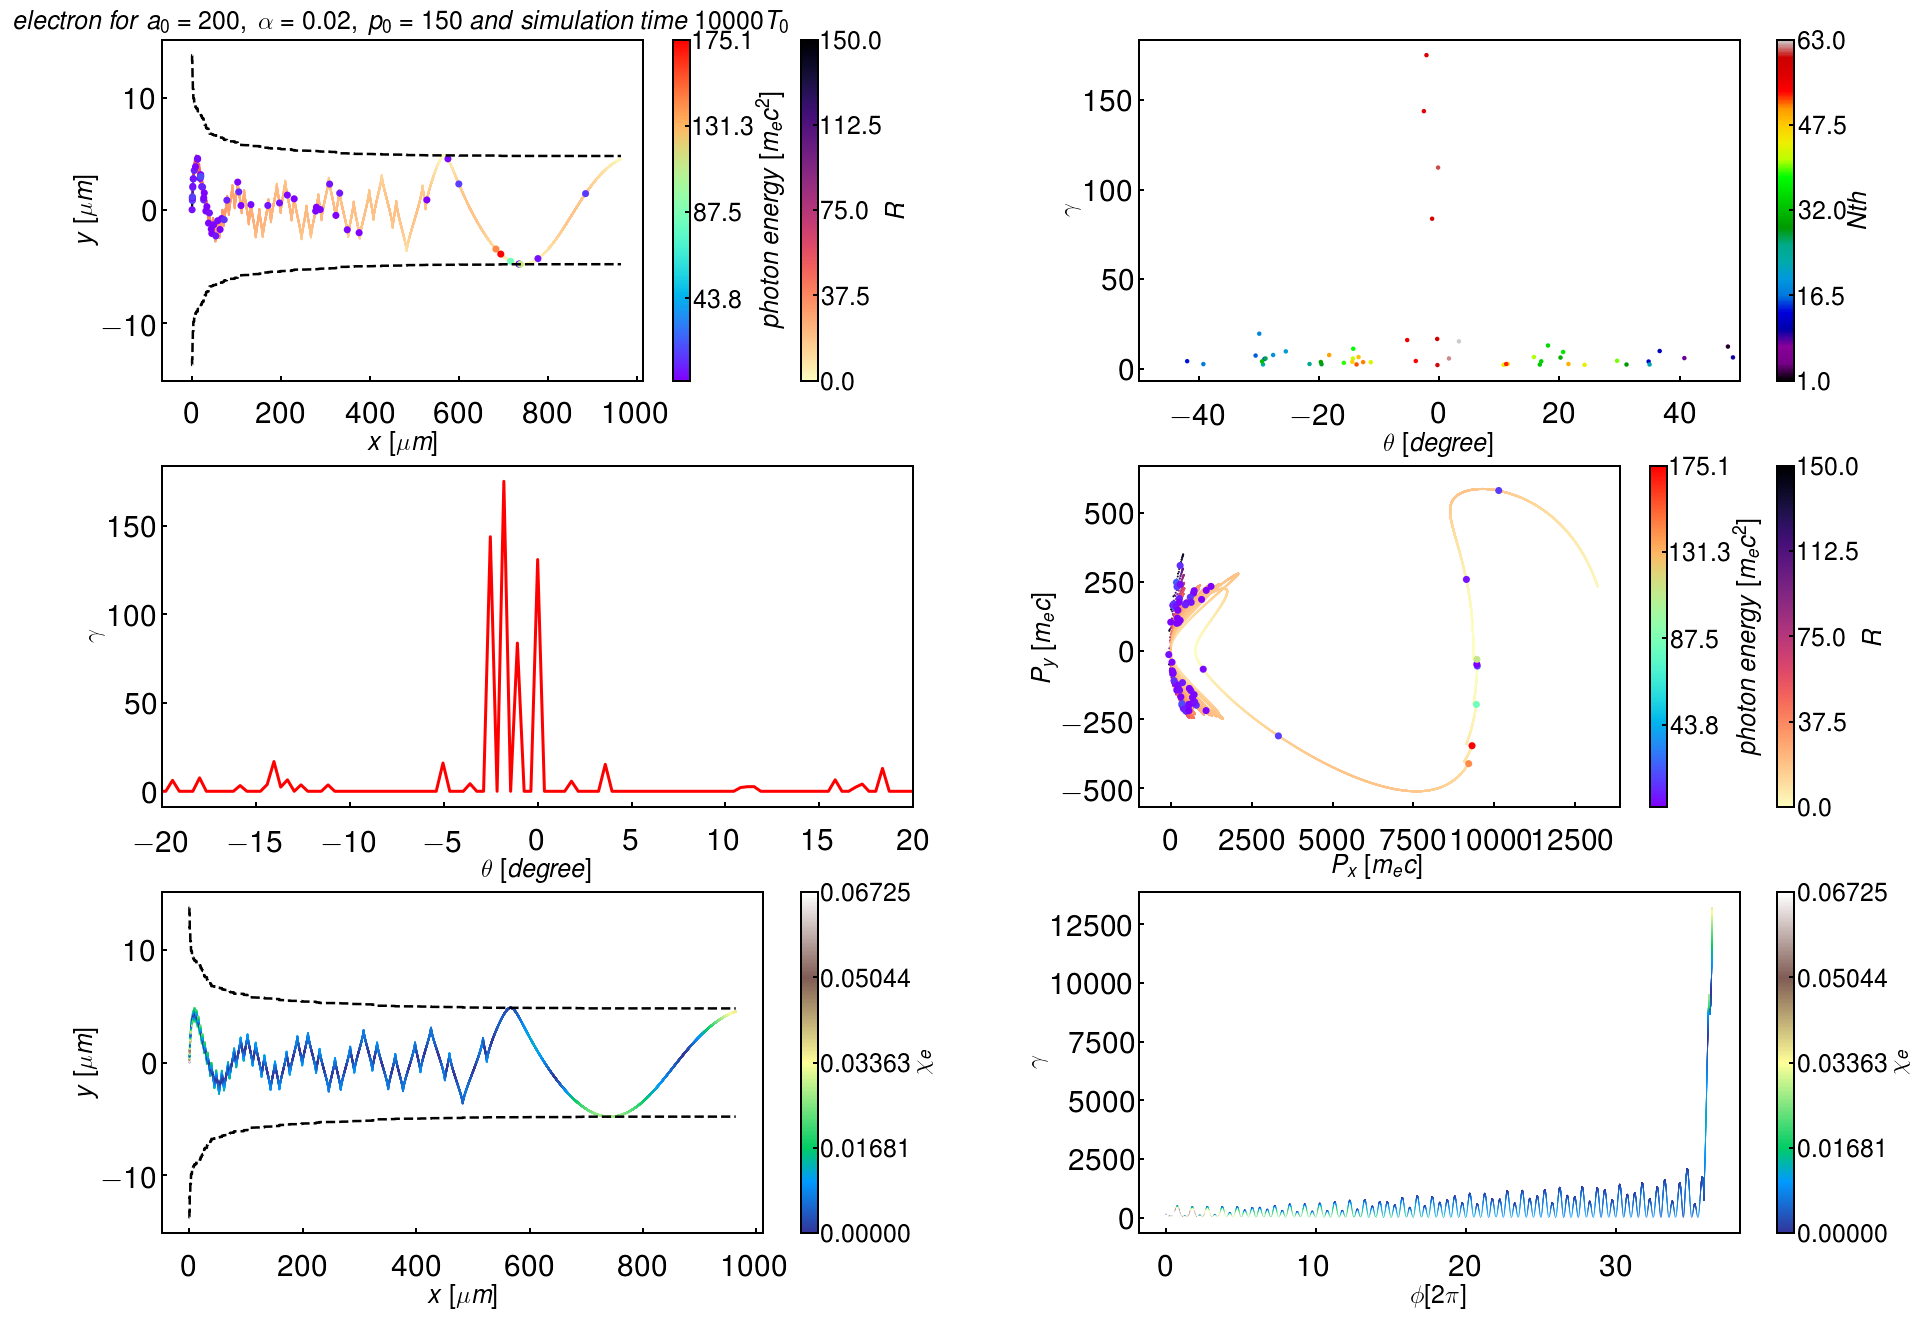

In [7]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def momentum_to_theta(arg_x, arg_y):
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi





part_number=100
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(150)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/2.0/np.pi

index=2

radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])

condition = np.where(radt_x>2)


#momentum_to_theta(arg_x, arg_y)

#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(3,2,1)
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5),shrink=1)
cbar.set_label(r'$R$', fontdict=font)

plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150\ and\ simulation\ time\ 10000T_0$',fontdict=font)

arg_px = px[index,condition]
arg_py = py[index,condition]
radt_x=(radt[index,1:]-radt[index,:-1])
arg_gg = radt_x[condition]
theta_x = np.zeros_like(arg_px)
#print(arg_py/arg_px)
for i in range(np.size(theta_x)):
    theta_x[0,i]=momentum_to_theta(arg_px[0,i],arg_py[0,i])

plt.subplot(3,2,2)
plt.scatter(theta_x/np.pi*180, arg_gg, c=np.linspace(1,np.size(theta_x),np.size(theta_x))[np.newaxis,:], s=20, cmap='nipy_spectral', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(1, np.size(theta_x), 5), shrink=1)# orientation='horizontal', shrink=0.2)
cbar.set_label(r'$Nth$', fontdict=font)
plt.xlim(-50,50)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0,2000.0)


theta_grid = np.linspace(-180.0, 180.0, 1001)
theta_energy = np.zeros_like(theta_grid)
theta_x/np.pi*180
for i in range(np.size(theta_x/np.pi*180)):
    theta_energy[np.min(np.where(theta_x[0,i]/np.pi*180 < theta_grid))]+=arg_gg[i]
#print(theta_energy)
plt.subplot(3,2,3)
plt.plot(theta_grid, theta_energy, '-r', linewidth=3)
plt.xlim(-20,20)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,4)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=4, cmap='magma_r', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
plt.scatter(px[index,condition],py[index,condition],c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);


plt.subplot(3,2,5)
#plt.scatter(x[index,condition]/2/np.pi,y[index,condition]/2/np.pi,c=(radt_x[condition])[np.newaxis,:], s=50, cmap='rainbow', edgecolors='None')
#cbar=plt.colorbar(ticks=np.linspace(np.min(radt_x[radn_x>0]), np.max(radt_x[radn_x>0]), 5), shrink=1)
#cbar.set_label(r'$photon\ energy\ [m_ec^2]$', fontdict=font)

plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=eta[index,:], s=4, cmap='terrain', edgecolors='None')
#plt.scatter((t[index,:]-x[index,:])/2/np.pi, y_max, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi, y_max[index,:],'--k',linewidth=2.5,label=r'$Reduced\ w=1$')
plt.plot(x[index,:]/2/np.pi, -y_max[index,:],'--k',linewidth=2.5)
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5),shrink=1)
cbar.set_label(r'$\chi_e$', fontdict=font)

#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x\ [\mu m]$',fontdict=font)
plt.ylabel(r'$y\ [\mu m]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title(r'$electron\ for\ a_0=200,\ \alpha=0.02,\  p_0=150$',fontdict=font)


plt.subplot(3,2,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=eta[index,:], s=1, cmap='terrain', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(eta[index,:]), np.max(eta[index,:]), 5))
cbar.set_label(r'$\chi_e$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)


plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.25, wspace=0.30)

fig = plt.gcf()
#fig.set_size_inches(30, 15)
fig.set_size_inches(30, 19.5)
#fig.savefig('./png_a200_b002_p150/qed_photon_1000_com.png',format='png',dpi=80)
#plt.close("all")


In [63]:
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
import sys
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
font = {'family' : 'Carlito',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
       }

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def momentum_to_theta(arg_x, arg_y):
    if arg_x == 0.00:
        arg_x += (random.uniform(0, 1)-0.5)/1000.0
    if arg_x >= 0:
        return np.arctan(arg_y/arg_x)
    elif arg_y > 0:
        return np.arctan(arg_y/arg_x)+np.pi
    else:
        return np.arctan(arg_y/arg_x)-np.pi





part_number=100
nsteps=20001

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
#z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
#pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
radpx1=np.loadtxt(insert1+'rad_px'+insert_n+'.txt')
#opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
#eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
#z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
#pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
radpx=np.reshape(radpx1,(part_number,nsteps))
#opt=np.reshape(opt1,(part_number,nsteps))
#eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

py_0 = 1.00*int(150)
R_max = py_0-(radt-radpx)

y_max0=(py_0/0.02)**0.5
y_max=((py_0-(radt-radpx))/0.02)**0.5/2.0/np.pi

index=14

radn_x=(radn[index,1:]-radn[index,:-1])
radt_x=(radt[index,1:]-radt[index,:-1])

condition = np.where(radt_x>2)

arg_px = px[index,condition]
arg_py = py[index,condition]
radt_x=(radt[index,1:]-radt[index,:-1])
arg_gg = radt_x[condition]
theta_x = np.zeros_like(arg_px)
energy_x = np.zeros_like(arg_px)
#print(arg_py/arg_px)
for i in range(np.size(theta_x)):
    theta_x[0,i]=momentum_to_theta(arg_px[0,i],arg_py[0,i])
    energy_x[0,i]=arg_gg[i]

theta_grid = np.linspace(-180.0, 180.0, 61)
energy_grid= np.linspace(2,2002,51)

x_grid = np.linspace(-180.0, 180.0, 60)
y_grid = np.linspace(2,2002,50)
x_grid,y_grid = np.meshgrid(x_grid,y_grid)

theta_energy = np.zeros_like(x_grid)
theta_energy = theta_energy.T
theta_x/np.pi*180

for i in range(np.size(theta_x/np.pi*180)):
    index_x = np.min(np.where(theta_x[0,i]/np.pi*180 < theta_grid))-1
    index_y = np.min(np.where(energy_x[0,i] < energy_grid))-1
    theta_energy[index_x,index_y]+=1
#print(theta_energy)

print(x_grid.shape,y_grid.shape,theta_energy.shape)

ax=plt.subplot(2,1,1)
levels = np.linspace(np.min(theta_energy), np.max(theta_energy), 10)
plt.pcolormesh(x_grid, y_grid, theta_energy.T, cmap='nipy_spectral')
#plt.contourf(x_grid, y_grid, theta_energy.T, levels=levels, cmap='hot_r', alpha=.7)
cbar=plt.colorbar(ticks=np.linspace(np.min(levels), np.max(levels), 5))
cbar.set_label(r'$N$', fontdict=font)#plt.xlim(47,53)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)

plt1 = plt.twinx()
z_value = y_grid * theta_energy.T
plt.plot(x_grid[0,:],np.sum(z_value,axis=0),'--y',linewidth=1.5)
plt1.set_ylabel('Normalized')  
#plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
#plt.ylim(-1.025,1.025)
plt.xlim(-180,180)
#plt.legend(loc='best')

ax=plt.subplot(2,1,2)
plt.scatter(theta_x/np.pi*180, arg_gg, c=np.linspace(1,np.size(theta_x),np.size(theta_x))[np.newaxis,:], s=20, cmap='nipy_spectral', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(1, np.size(theta_x), 5), shrink=1)# orientation='horizontal', shrink=0.2)
cbar.set_label(r'$Nth$', fontdict=font)
plt.xlim(-45,45)
#print(theta_x)
plt.xlabel(r'$\theta\ [degree]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
#plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0,2000.0)


plt.subplots_adjust(top=0.95, bottom=0.10, left=0.15, right=0.95, hspace=0.25, wspace=0.30)

fig = plt.gcf()
#fig.set_size_inches(30, 15)
fig.set_size_inches(8, 13)
#fig.savefig('./png_a200_b002_p150/qed_photon_1000_com.png',format='png',dpi=80)
#plt.close("all")


ValueError: zero-size array to reduction operation minimum which has no identity

In [71]:
energy_x[0,i]

3090.62238

In [14]:
theta_grid = np.linspace(-180.0, 180.0, 61)
energy_grid= np.linspace(2,2002,50)

In [23]:
np.shape(np.outer(theta_grid,energy_grid))

(61, 50)

In [43]:
import numpy as np
theta_grid = np.linspace(-180.0, 180.0, 61)
energy_grid= np.linspace(2,2002,50)
[x_grid,y_grid] = np.meshgrid(theta_grid,energy_grid)
print(x_grid.shape,y_grid.shape)
print(np.shape()))

(50, 61) (50, 61)
(61, 50)


In [58]:
theta_grid = np.linspace(-180.0, 180.0, 61)
energy_grid= np.linspace(2,2002,51)

x_grid = np.linspace(-180.0, 180.0, 180)
y_grid = np.linspace(2,2002,200)
x_grid,y_grid = np.meshgrid(theta_grid,energy_grid)

theta_energy = np.zeros_like(x_grid)

print(x_grid.shape,y_grid.shape)
print(np.shape(theta_energy))

(51, 61) (51, 61)
(51, 61)


In [56]:
x_grid[0,:]

array([-180., -174., -168., -162., -156., -150., -144., -138., -132.,
       -126., -120., -114., -108., -102.,  -96.,  -90.,  -84.,  -78.,
        -72.,  -66.,  -60.,  -54.,  -48.,  -42.,  -36.,  -30.,  -24.,
        -18.,  -12.,   -6.,    0.,    6.,   12.,   18.,   24.,   30.,
         36.,   42.,   48.,   54.,   60.,   66.,   72.,   78.,   84.,
         90.,   96.,  102.,  108.,  114.,  120.,  126.,  132.,  138.,
        144.,  150.,  156.,  162.,  168.,  174.,  180.])

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


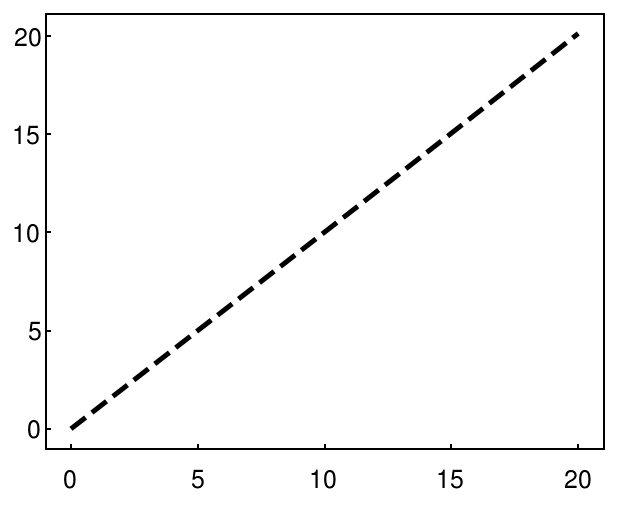

In [76]:
alpha=0.01
p0=100
x=np.linspace(0,20,401)
y=0.5*(p0/alpha)**0.5*np.exp((alpha/p0)**0.5*x)-0.5*(p0/alpha)**0.5*np.exp(-(alpha/p0)**0.5*x)
plt.plot(x,y,'--k')

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(0.003150773558906428, 0.5)

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


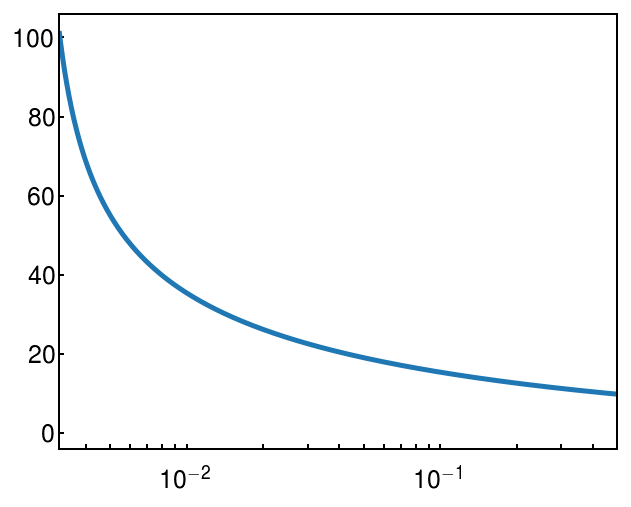

In [135]:
p0=np.linspace(1,101,1001)
a0=50.0
k=10
alpha=p0*(1+p0**2+a0**2/2.0)**2/(2*p0*p0*k*p0**0.5)**2
plt.plot(alpha,p0)
plt.xscale('log')
plt.xlim(-3.5,0.5)